In [13]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)

/home/hitech/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist['data'].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
x=mnist['data']
y=mnist['target']

In [15]:
import pandas as pd
x=pd.DataFrame(x)

In [8]:
x.shape,y.shape

((70000, 784), (70000,))

In [20]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


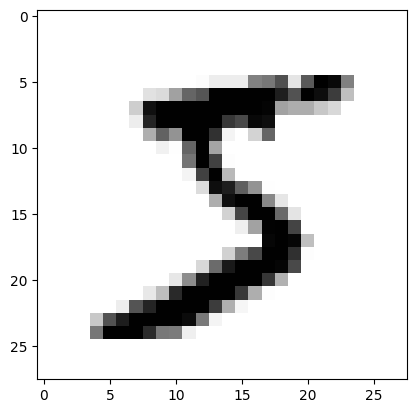

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=x.iloc[0]
some_digit_image=some_digit.values.reshape(28,28)

plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.show()

In [31]:
import numpy as np
y=y.astype(np.uint8)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [29]:
x_train.shape,y_train.shape

((56000, 784), (56000,))

In [30]:
y[0]

5

In [32]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier()

In [34]:
sgd_clf.fit(x_train,y_train)

SGDClassifier()

In [37]:
res=sgd_clf.predict([some_digit])
print(res[0])

5


/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [38]:
some_digit_score=sgd_clf.decision_function([some_digit])
print(some_digit_score)

[[-27386.35451404 -31150.27210146 -23698.54646528  -5766.98540475
  -31760.94069751   -191.61855001 -34702.27227622 -14750.99116713
   -7922.07923299 -11136.44553266]]


/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [40]:
max_index=np.argmax(some_digit_score)
max_index

5

In [43]:
class_array=sgd_clf.classes_

In [44]:
predicted_digit=class_array[max_index]
predicted_digit

5

In [50]:
# OVO
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

In [51]:
ovo_clf.fit(x_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [52]:
ovo_clf.predict([some_digit])

/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [53]:
len(ovo_clf.estimators_)

45

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

In [56]:
forest_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
forest_clf.predict([some_digit])

/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [58]:
len(forest_clf.estimators_)

100

In [59]:
probability=forest_clf.predict_proba([some_digit])

/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
probability.shape

(1, 10)

In [61]:
print(probability)

[[0.   0.   0.   0.04 0.   0.92 0.01 0.   0.01 0.02]]


In [62]:
from sklearn.multiclass import OneVsRestClassifier
ova_clf=OneVsRestClassifier(SGDClassifier(random_state=42))

In [63]:
ova_clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=SGDClassifier(random_state=42))

In [64]:
ova_clf.predict([some_digit])

/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning

array([5], dtype=uint8)

In [65]:
len(ova_clf.estimators_)

10

In [76]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix

In [75]:
score1=cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

In [68]:
score1

array([0.87410939, 0.8545026 , 0.84410158])

In [70]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train.astype(np.float64))


In [71]:
score2=cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

/home/hitech/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [72]:
score2

array([0.90143033, 0.90609096, 0.89933569])

In [77]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mat=confusion_matrix(y_train,y_train_pred)

/home/hitech/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [78]:
conf_mat

array([[5217,    0,   13,    4,    6,   40,   34,    8,  172,    2],
       [   2, 6022,   39,   17,    4,   44,    7,    9,  158,   12],
       [  19,   28, 4884,   80,   67,   26,   73,   44,  312,   12],
       [  23,   15,  108, 4911,    2,  201,   23,   36,  319,   68],
       [   7,   13,   48,   10, 4903,    8,   33,   19,  232,  163],
       [  28,   15,   23,  149,   55, 4304,   68,   15,  409,   66],
       [  35,   14,   39,    0,   43,   95, 5156,   12,  122,    1],
       [  20,   11,   64,   23,   51,   10,    4, 5321,  137,  195],
       [  16,   62,   44,   87,    6,  113,   29,   11, 5029,   47],
       [  23,   24,   27,   51,  120,   39,    1,  150,  268, 4871]])

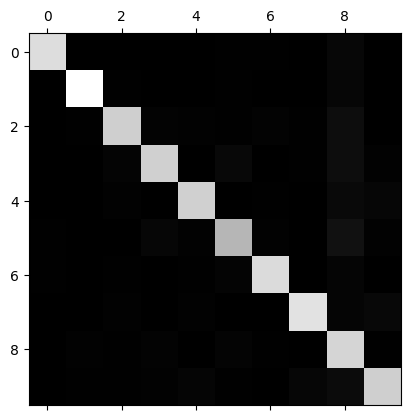

In [81]:
plt.matshow(conf_mat,cmap=plt.cm.gray)
plt.show()

In [82]:
row_sum=conf_mat.sum(axis=1,keepdims=True)

In [83]:
row_sum

array([[5496],
       [6314],
       [5545],
       [5706],
       [5436],
       [5132],
       [5517],
       [5836],
       [5444],
       [5574]])

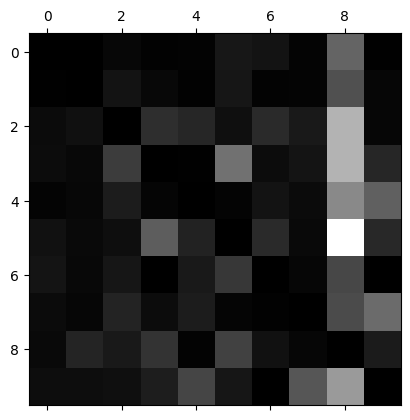

In [84]:
norm_conf_mat=conf_mat/row_sum
np.fill_diagonal(norm_conf_mat,0)
plt.matshow(norm_conf_mat,cmap=plt.cm.gray)
plt.show()

In [86]:
y_train_pred.shape

(56000,)

In [91]:
cl_a,cl_b=3,5
x_aa=x_train[(y_train==cl_a)&(y_train_pred==cl_a)]
x_ab=x_train[(y_train==cl_a)&(y_train_pred==cl_b)]
x_ba=x_train[(y_train==cl_b)&(y_train_pred==cl_a)]
x_bb=x_train[(y_train==cl_b)&(y_train_pred==cl_b)]

In [107]:
def plot_digits(x,images_per_row):
    plt.imshow(x)

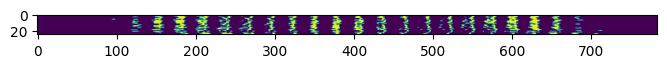

In [108]:
plt.figure(figsize=(8,8))
# plt.subplot(221)
plot_digits(x_aa[:25],images_per_row=5)

In [115]:
# MultiLabel Classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=5)
y_odd=(y_train%2==1)

y_multilabel=np.c_[y_train_large,y_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

In [116]:
knn_clf.predict([some_digit])

/home/hitech/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ True,  True]])

In [117]:
from sklearn.metrics import f1_score

In [118]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

0.9807221812940032

In [119]:
f1_score(y_multilabel,y_train_knn_pred,average='weighted')

0.9807319155119968

In [120]:
noise = np.random.randint(0,100,(len(x_train),784))
x_train_mod=x_train+noise
noise = np.random.randint(0,100,(len(x_test),784))
x_test_mod=x_test+noise
y_train_mod=x_train
y_test_mod=x_test

In [122]:
knn_clf.fit(x_train_mod,y_train_mod)

KNeighborsClassifier()

In [128]:
knn_clf.predict([x_test_mod.loc[[1]].values])

KeyError: "None of [Index([1], dtype='int64')] are in the [index]"